# Libraries

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data

In [76]:
# Define the dataset
data = {
    'Expenditure': [30, 40, 80, 100, 110, 90, 150, 180, 160, 190],
    'Savings': [25, 35, 60, 70, 90, 150, 130, 160, 200, 220],
    'Investments': [20, 25, 50, 60, 75, 110, 140, 120, 190, 200],
    'Loans': [15, 50, 90, 130, 180, 200, 280, 300, 350, 390],
    'Salary': [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000]
}


In [77]:
df = pd.DataFrame(data)

In [67]:
df

,Expenditure,Savings,Investments,Loans,Salary
0,30,25,20,15,50
1,40,35,25,50,100
2,80,60,50,90,200
3,100,70,60,130,300
4,110,90,75,180,400
5,90,150,110,200,500
6,150,130,140,280,600
7,180,160,120,300,700
8,160,200,190,350,800
9,190,220,200,390,1000


# Model Building

In [81]:
X = df[['Expenditure', 'Savings',	'Investments',	'Loans']]
y = df['Salary']

In [83]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [84]:
model.coef_

array([1.02440604, 1.90670388, 0.37085078, 0.82326093])

In [85]:
model.intercept_

-68.25364615900969

In [92]:
y_pred = model.predict(X)

# Visualization

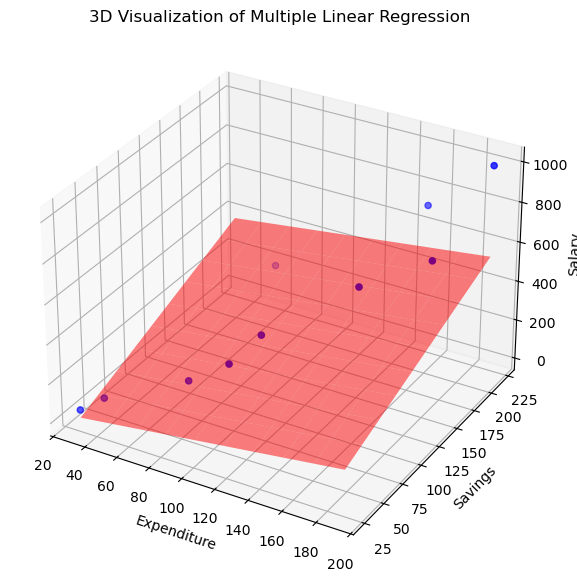

In [90]:
# 3D Plot using two independent variables
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Expenditure'], df['Savings'], y, color='blue', label="Actual Salary")

# Create regression plane
x_surf, y_surf = np.meshgrid(np.linspace(df['Expenditure'].min(), df['Expenditure'].max(), 10),
                             np.linspace(df['Savings'].min(), df['Savings'].max(), 10))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='red')

ax.set_xlabel("Expenditure")
ax.set_ylabel("Savings")
ax.set_zlabel("Salary")
ax.set_title("3D Visualization of Multiple Linear Regression")
plt.show()

# Metrics

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print('MSE : ', mse)
print('MAE : ', mae)
print('RMSE : ', rmse)

MSE :  638.9690649300741
MAE :  20.02595578624834
RMSE :  25.2778374258969


In [95]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
adjusted_r2 = (1 - (1-r2)*(len(y)-1)/(len(y)- X_test.shape[1]-1))

print('r2 : ', r2)
print('adjusted_r2 : ', adjusted_r2)

NameError: name 'X_test' is not defined